In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
admission_df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [12]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
admission_df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [14]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [15]:
admission_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Visualize Dataset

In [16]:
admission_df.drop(["Serial No."], axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [18]:
column_headers = admission_df.columns.values
column_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Chance of Admit '], dtype=object)

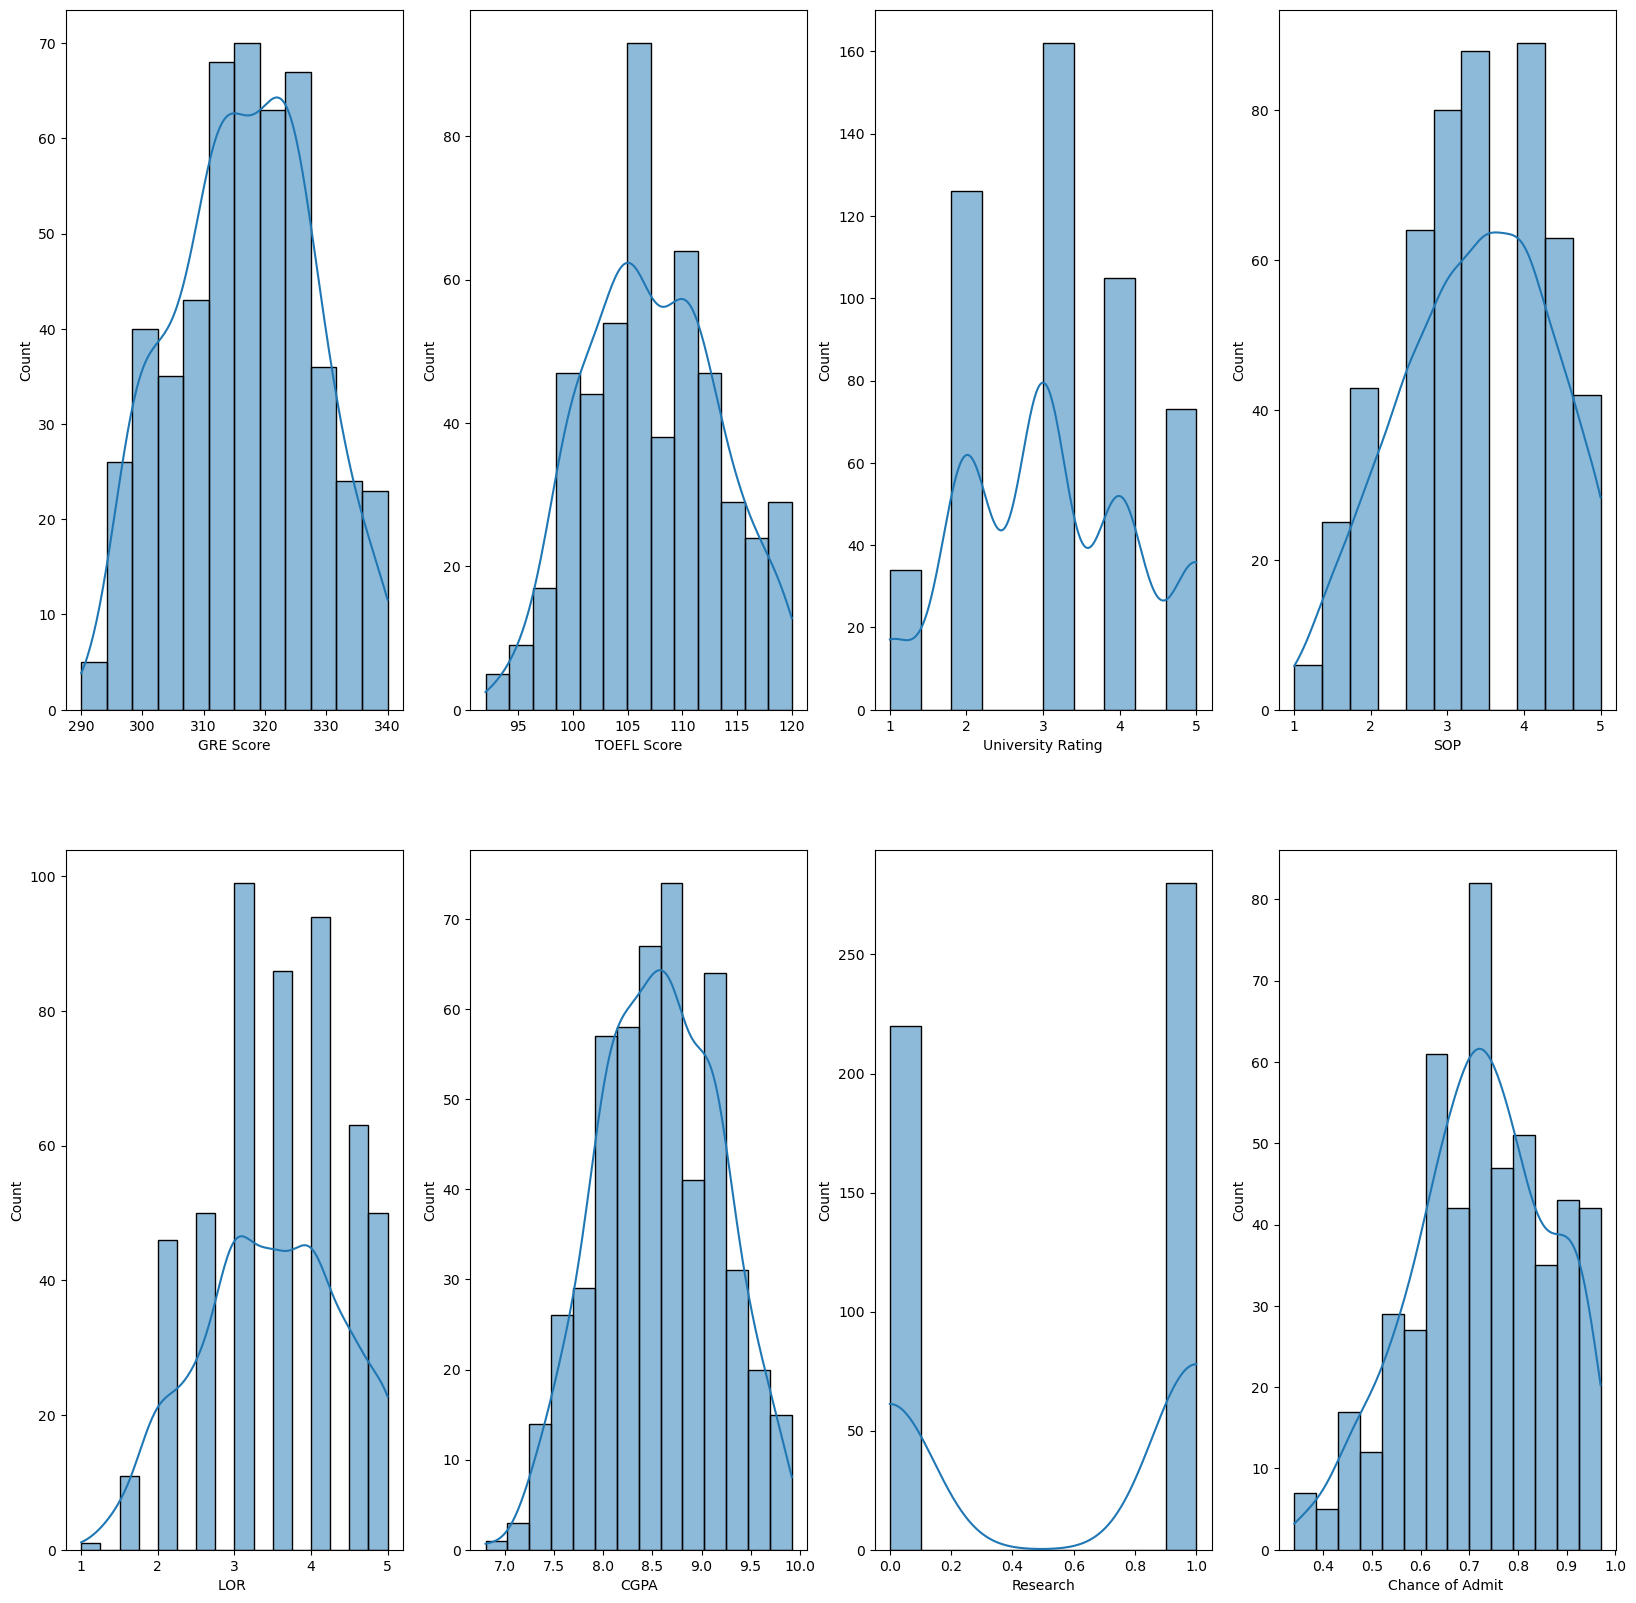

In [22]:
i = 1
fig, ax = plt.subplots(2,4, figsize = (20,20))

for column in column_headers:
    plt.subplot(2,4,i)
    sns.histplot(admission_df[column], kde = True)
    i += 1

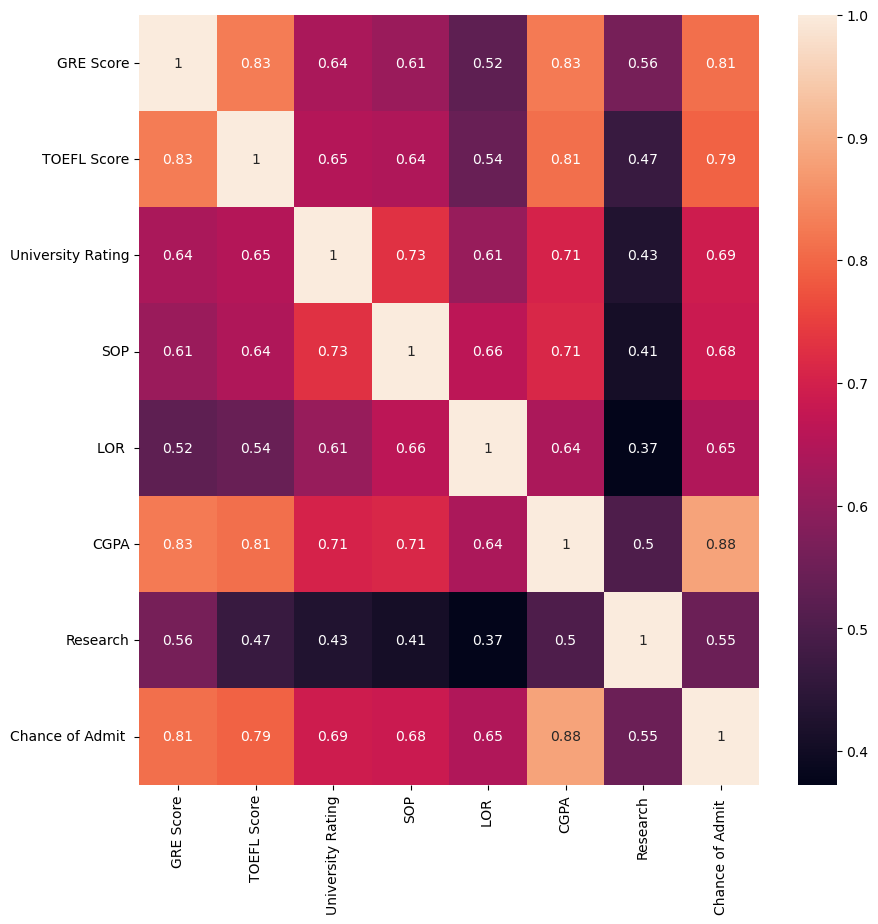

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(admission_df.corr(), annot = True)
plt.show()

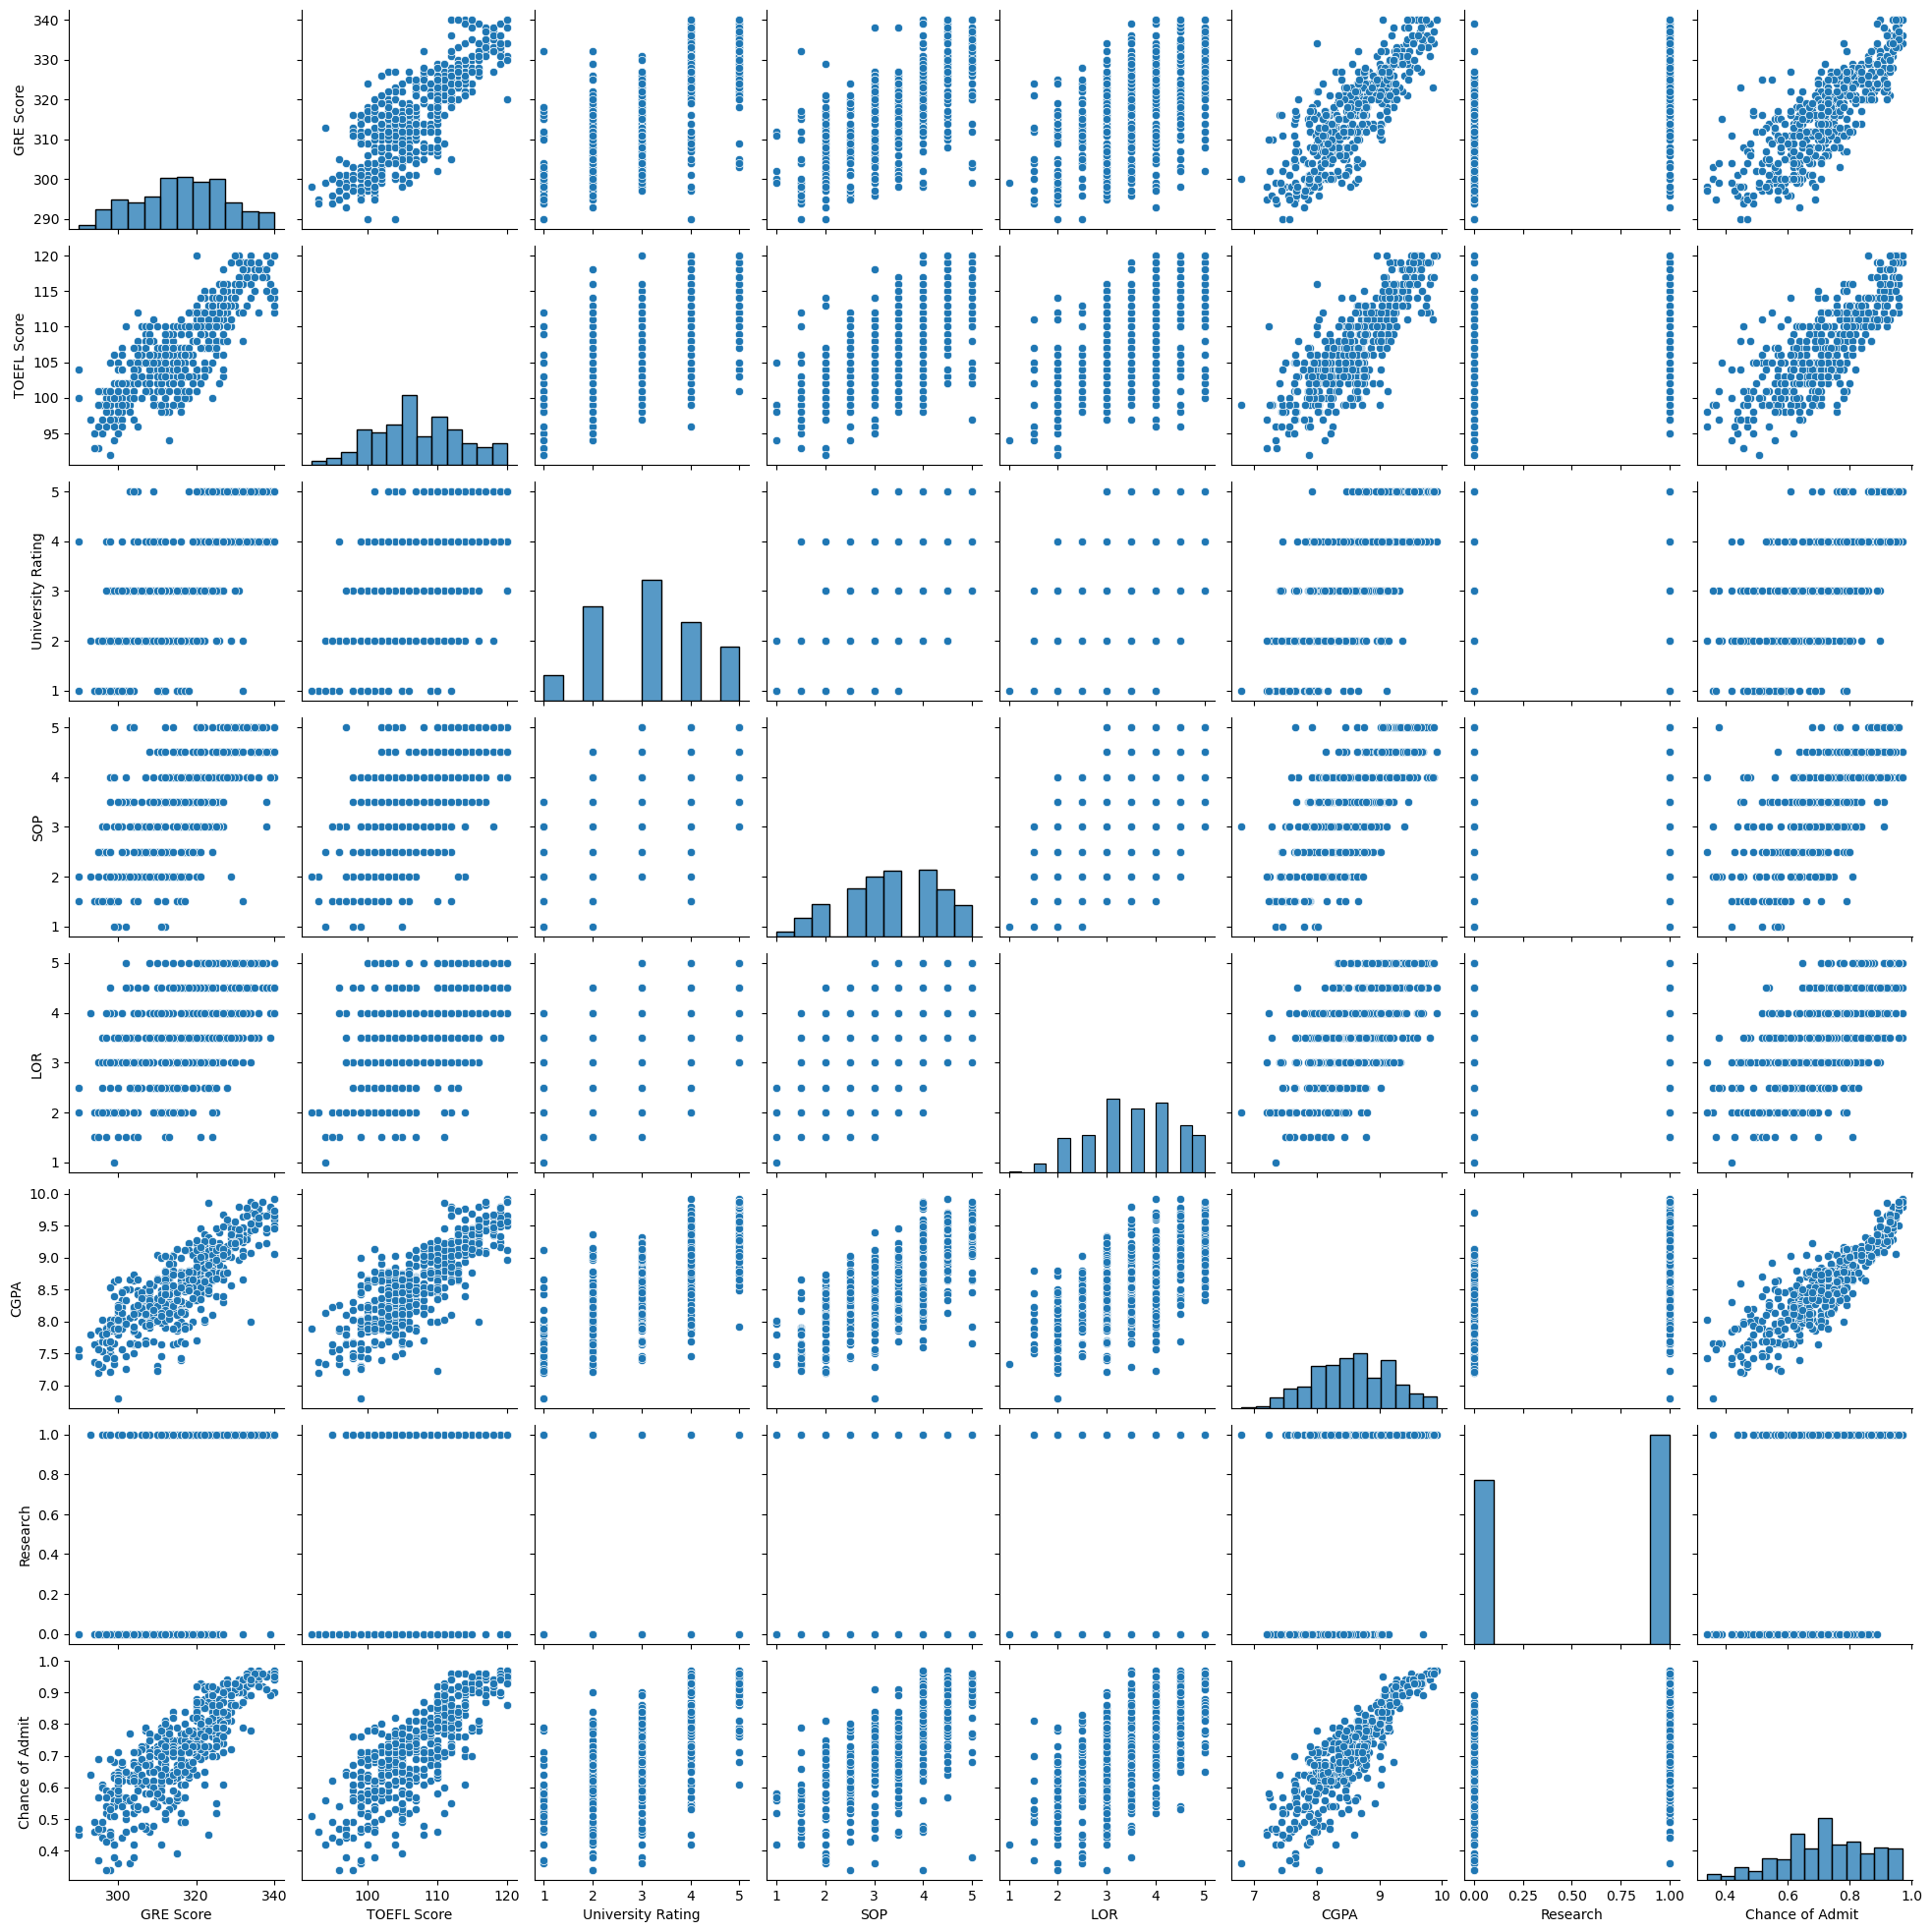

In [26]:
sns.pairplot(admission_df)
plt.show()

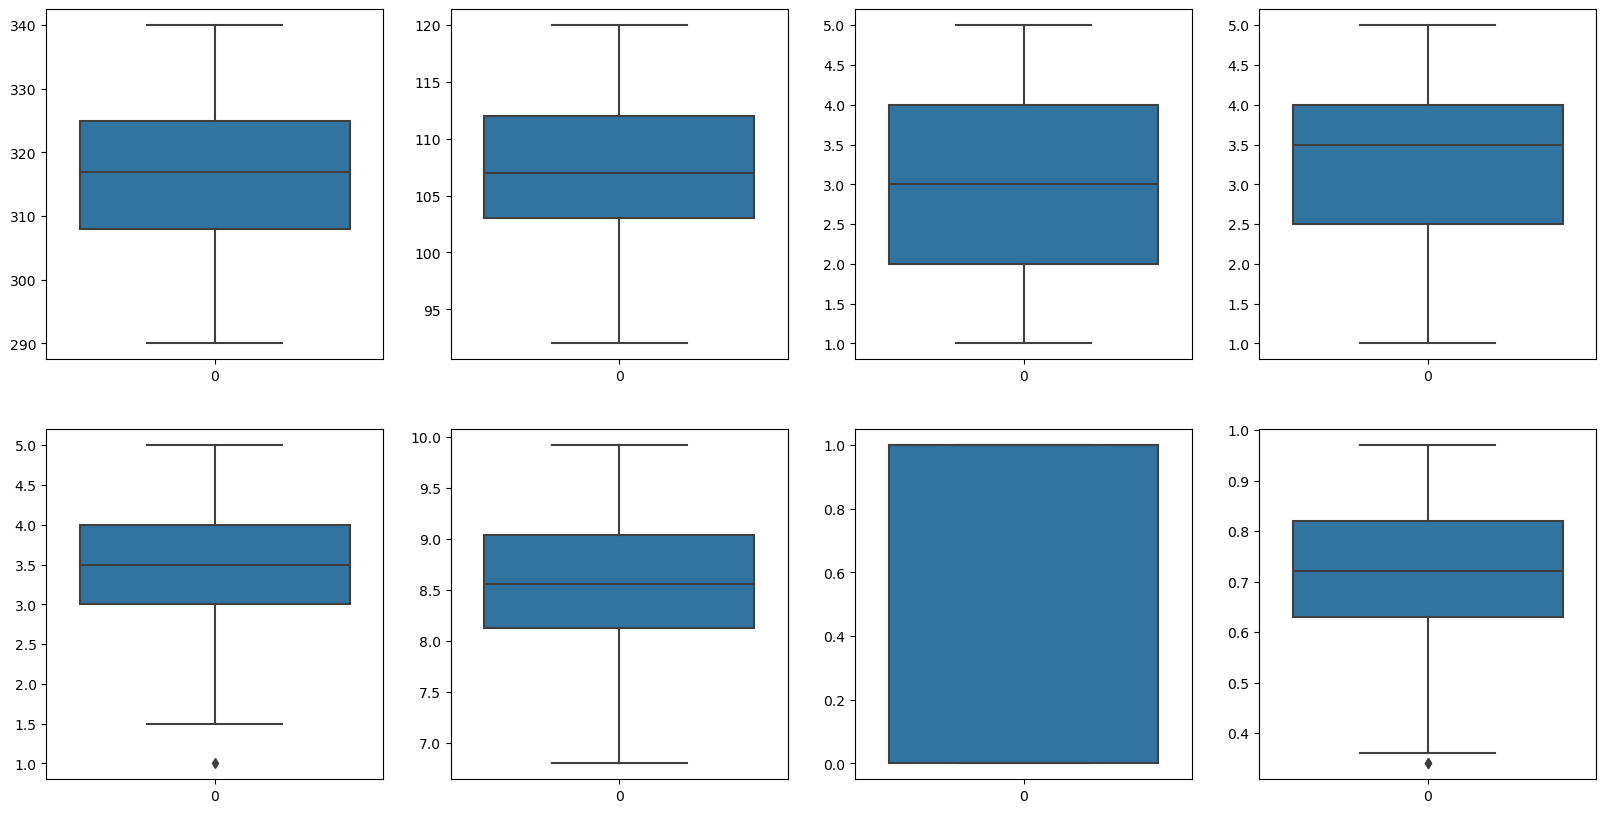

In [27]:
i = 1 
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column in column_headers:
    plt.subplot(2,4,i)
    sns.boxplot(admission_df[column])
    i += 1

## Testing and Training Data

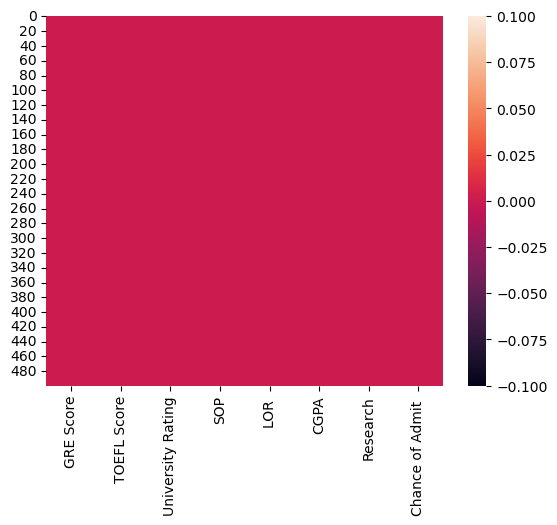

In [29]:
sns.heatmap(admission_df.isnull())
plt.show()

In [32]:
X = admission_df.drop(["Chance of Admit "], axis = 1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [33]:
y = admission_df["Chance of Admit "]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [112]:
X_train.shape

(350, 7)

In [113]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [114]:
print(f"Linear Model Coefficients -> m: {regressor.coef_} b: {regressor.intercept_}")

Linear Model Coefficients -> m: [0.00185851 0.00277797 0.00594137 0.00158614 0.01685874 0.11838505
 0.02430748] b: -1.275725082996986


In [115]:
y_predict = regressor.predict(X_test)

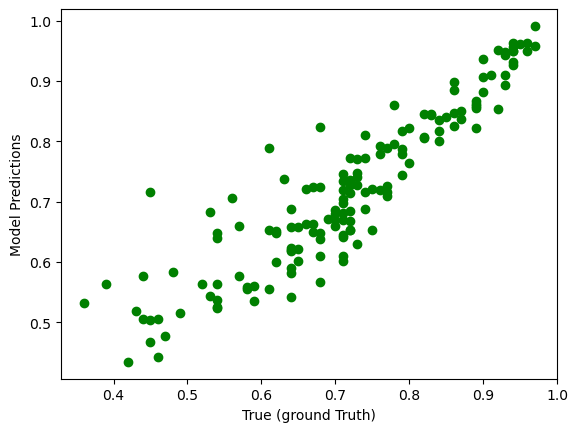

In [116]:
plt.scatter(y_test, y_predict, color = "green")
plt.ylabel("Model Predictions")
plt.xlabel("True (ground Truth)")
plt.show()

In [117]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt 

k = X_test.shape[1]
n = len(X_test)

In [118]:
k

7

In [119]:
n

150

In [120]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (((1 - r2) * (n-1)) / (n - k - 1))
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test) ) * 100

In [121]:
print(f"RMSE = {round(RMSE,3)} \nMSE = {round(MSE,3)} \nMAE = {round(MAE,3)} \nr2 = {r2} \nadj_r2 = {adj_r2} \nMAPE = {round(MAPE,2)}% error")

RMSE = 0.059 
MSE = 0.003 
MAE = 0.042 
r2 = 0.8324810015001771 
adj_r2 = 0.8242230227008901 
MAPE = 6.81% error


20% Testing 80% Training

RMSE = 0.059 

MSE = 0.004 

MAE = 0.042 

r2 = 0.8280820691344065 

adj_r2 = 0.8150013570033288 

MAPE = 6.71% error

In [122]:
predictions = pd.DataFrame( { "GRE Score" : [337, 324, 316, 322 ,314, 300],
                             "TOEFL Score": [118,107,104,110,103, 112],
                             "University Rating": [4,4,3,3,2,3],
                             "SOP": [4.5,4.0,3.0,3.5,2.0, 3.5],
                             "LOR ": [4.5,4.5,3.5,2.5,3.0,4.5],
                              "CGPA": [9.65, 8.87,8.00,8.67,8.21, 8.9],
                             "Research": [1,1,1,1,0,1]
                            
                            })
predictionsFit = regressor.predict(predictions)
predictionsFit

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.77013415])

## Retraining the Model

In [123]:
X = admission_df[["GRE Score", "CGPA"]]
X

,GRE Score,CGPA
0,337,9.65
1,324,8.87
2,316,8.00
3,322,8.67
4,314,8.21
...,...,...
495,332,9.02
496,337,9.87
497,330,9.56
498,312,8.43


In [125]:
y = admission_df["Chance of Admit "]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [127]:
regressor = LinearRegression()

In [128]:
regressor.fit(X_train, y_train)

LinearRegression()

In [129]:
print(f"Linear Model Coefficients -> m: {regressor.coef_} b: {regressor.intercept_}")

Linear Model Coefficients -> m: [0.00369042 0.15037528] b: -1.7340865384794477


In [130]:
y_predict = regressor.predict(X_test)

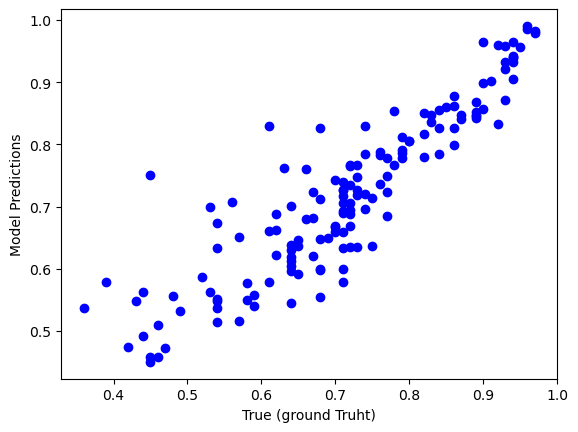

In [131]:
plt.scatter(y_test, y_predict, color = "blue")
plt.ylabel("Model Predictions")
plt.xlabel("True (ground Truht)")
plt.show()

In [132]:
k = X_test.shape[1]
n = len(X_test)

In [135]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (((1 - r2) * (n-1)) / (n - k - 1))
MAPE = np.mean( np.abs( (y_test - y_predict) / y_test) ) * 100